In [30]:
from google.colab import files
files.upload()


ModuleNotFoundError: No module named 'google.colab'

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [7]:
!kaggle datasets download -d alistairking/recyclable-and-household-waste-classification



Dataset URL: https://www.kaggle.com/datasets/alistairking/recyclable-and-household-waste-classification
License(s): MIT
 99% 913M/920M [00:12<00:00, 48.3MB/s]
100% 920M/920M [00:12<00:00, 79.7MB/s]


In [10]:
!unzip recyclable-and-household-waste-classification.zip -d waste_classification


Streaming output truncated to the last 5000 lines.
  inflating: waste_classification/images/images/plastic_shopping_bags/default/Image_1.png  
  inflating: waste_classification/images/images/plastic_shopping_bags/default/Image_10.png  
  inflating: waste_classification/images/images/plastic_shopping_bags/default/Image_100.png  
  inflating: waste_classification/images/images/plastic_shopping_bags/default/Image_101.png  
  inflating: waste_classification/images/images/plastic_shopping_bags/default/Image_102.png  
  inflating: waste_classification/images/images/plastic_shopping_bags/default/Image_103.png  
  inflating: waste_classification/images/images/plastic_shopping_bags/default/Image_104.png  
  inflating: waste_classification/images/images/plastic_shopping_bags/default/Image_105.png  
  inflating: waste_classification/images/images/plastic_shopping_bags/default/Image_106.png  
  inflating: waste_classification/images/images/plastic_shopping_bags/default/Image_107.png  
  inflating:

In [11]:
!cp recyclable-and-household-waste-classification.zip /content/drive/MyDrive/


In [15]:
import zipfile
zip_path = '/content/drive/MyDrive/Materials.zip'  # Path to the zip file in Drive
extract_path = '/content/drive/MyDrive/Materials'  # Where to extract the files

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")


Extraction complete!


Category and Image Count Extraction Script

In [15]:
# List categories
categories = os.listdir('/content/drive/MyDrive/Materials/Merged/')
category_info = {}

for category in categories:
    category_path = os.path.join('//content/drive/MyDrive/Materials/Merged/', category)
    if os.path.isdir(category_path):
        num_images = len(os.listdir(category_path))
        category_info[category] = num_images

# Number of categories
num_categories = len(category_info)

# Print the number of categories and the number of images per category
print(f"Number of categories: {num_categories}\n")

print("Number of images per category:")
for category, num_images in category_info.items():
    print(f"{category}: {num_images}")

Number of categories: 5

Number of images per category:
Metal: 1000
Cardboard: 1000
Paper: 1250
Glass: 1000
Plastic: 1000


Random Image Deletion for Class Balancing

In [16]:
import os
import random

# Path where the Paper images are located
paper_folder_path = '/content/drive/MyDrive/Materials/Merged/Paper'

# Get all image file paths in the Paper folder
all_images = [os.path.join(paper_folder_path, file) for file in os.listdir(paper_folder_path) if os.path.isfile(os.path.join(paper_folder_path, file))]

# Ensure there are at least 250 images to delete
if len(all_images) >= 250:
    # Randomly select 250 images to delete
    images_to_delete = random.sample(all_images, 250)

    # Delete the selected images
    for img_path in images_to_delete:
        os.remove(img_path)
        print(f"Deleted: {img_path}")
else:
    print("Not enough images to delete.")

# Print out the completion message
print("Random image deletion complete!")


Deleted: /content/drive/MyDrive/Materials/Merged/Paper/Image_161_1.png
Deleted: /content/drive/MyDrive/Materials/Merged/Paper/Image_211_3.png
Deleted: /content/drive/MyDrive/Materials/Merged/Paper/Image_65_1.png
Deleted: /content/drive/MyDrive/Materials/Merged/Paper/Image_198_1.png
Deleted: /content/drive/MyDrive/Materials/Merged/Paper/Image_101.png
Deleted: /content/drive/MyDrive/Materials/Merged/Paper/Image_102.png
Deleted: /content/drive/MyDrive/Materials/Merged/Paper/Image_157_3.png
Deleted: /content/drive/MyDrive/Materials/Merged/Paper/Image_240_1.png
Deleted: /content/drive/MyDrive/Materials/Merged/Paper/Image_29_1.png
Deleted: /content/drive/MyDrive/Materials/Merged/Paper/Image_22_3.png
Deleted: /content/drive/MyDrive/Materials/Merged/Paper/Image_191_3.png
Deleted: /content/drive/MyDrive/Materials/Merged/Paper/Image_207_2.png
Deleted: /content/drive/MyDrive/Materials/Merged/Paper/Image_163_4.png
Deleted: /content/drive/MyDrive/Materials/Merged/Paper/Image_62_3.png
Deleted: /cont

In [17]:
# List categories
categories = os.listdir('/content/drive/MyDrive/Materials/Merged/')
category_info = {}

for category in categories:
    category_path = os.path.join('//content/drive/MyDrive/Materials/Merged/', category)
    if os.path.isdir(category_path):
        num_images = len(os.listdir(category_path))
        category_info[category] = num_images

# Number of categories
num_categories = len(category_info)

# Print the number of categories and the number of images per category
print(f"Number of categories: {num_categories}\n")

print("Number of images per category:")
for category, num_images in category_info.items():
    print(f"{category}: {num_images}")

Number of categories: 5

Number of images per category:
Metal: 1000
Cardboard: 1000
Paper: 1000
Glass: 1000
Plastic: 1000


Data Splitting Script for Train-Test-Validate

In [18]:
import os
import random
import shutil

# Base path where the original categories are stored
base_path = '/content/drive/MyDrive/Materials/Merged'

# Directories for train, test, and validate
train_dir = '/content/drive/MyDrive/Materials/Split/train'
test_dir = '/content/drive/MyDrive/Materials/Split/test'
validate_dir = '/content/drive/MyDrive/Materials/Split/validate'

# Create directories if they don't exist
for folder in ['train', 'test', 'validate']:
    os.makedirs(os.path.join(train_dir, folder), exist_ok=True)
    os.makedirs(os.path.join(test_dir, folder), exist_ok=True)
    os.makedirs(os.path.join(validate_dir, folder), exist_ok=True)

# List of categories
categories = ['Metal', 'Cardboard', 'Paper', 'Glass', 'Plastic']

# Split each category into train, test, and validate
for category in categories:
    category_path = os.path.join(base_path, category)

    # Get list of all images in the category
    all_images = [os.path.join(category_path, file) for file in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, file))]

    # Shuffle images to ensure randomness
    random.shuffle(all_images)

    # Split the data into 80-10-10
    train_size = int(0.8 * len(all_images))
    test_size = int(0.1 * len(all_images))
    validate_size = len(all_images) - train_size - test_size

    # Assign images to train, test, and validate sets
    train_images = all_images[:train_size]
    test_images = all_images[train_size:train_size + test_size]
    validate_images = all_images[train_size + test_size:]

    # Define destination paths for each split
    category_train_path = os.path.join(train_dir, category)
    category_test_path = os.path.join(test_dir, category)
    category_validate_path = os.path.join(validate_dir, category)

    # Create subdirectories for each category if they don't exist
    os.makedirs(category_train_path, exist_ok=True)
    os.makedirs(category_test_path, exist_ok=True)
    os.makedirs(category_validate_path, exist_ok=True)

    # Move images to their respective directories
    for img in train_images:
        shutil.move(img, os.path.join(category_train_path, os.path.basename(img)))

    for img in test_images:
        shutil.move(img, os.path.join(category_test_path, os.path.basename(img)))

    for img in validate_images:
        shutil.move(img, os.path.join(category_validate_path, os.path.basename(img)))

    print(f"Category {category}: Train {len(train_images)}, Test {len(test_images)}, Validate {len(validate_images)}")

print("Data splitting complete!")


Category Metal: Train 800, Test 100, Validate 100
Category Cardboard: Train 800, Test 100, Validate 100
Category Paper: Train 800, Test 100, Validate 100
Category Glass: Train 800, Test 100, Validate 100
Category Plastic: Train 800, Test 100, Validate 100
Data splitting complete!


Visualize Sample Images

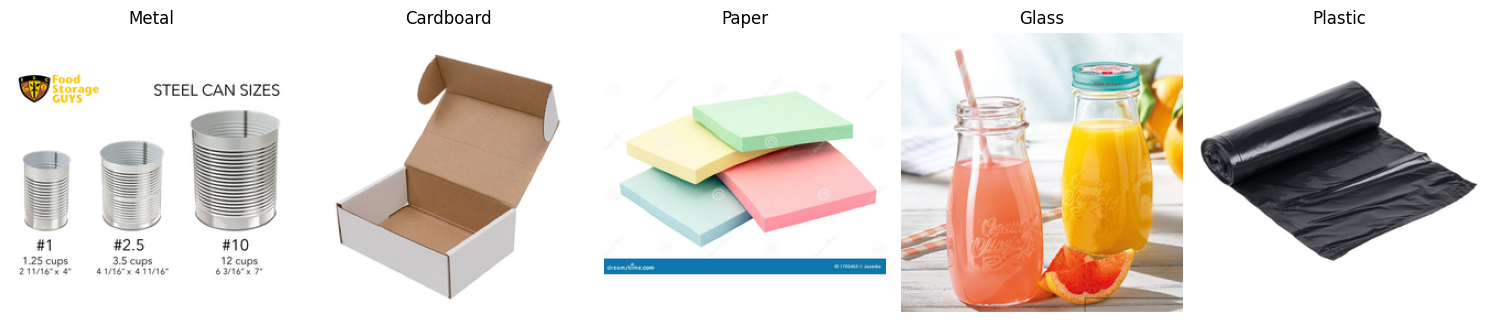

In [2]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define the train directory
train_dir = 'Dataset/train'

# List of categories
categories = ['Metal', 'Cardboard', 'Paper', 'Glass', 'Plastic']

# Create a figure to display the images
fig, axes = plt.subplots(1, len(categories), figsize=(15, 5))

# Iterate through each category and display a random sample from the train set
for i, category in enumerate(categories):
    category_train_path = os.path.join(train_dir, category)

    # Get all image files in the category
    all_images = [file for file in os.listdir(category_train_path) if os.path.isfile(os.path.join(category_train_path, file))]

    # Choose a random image from the category
    random_image = random.choice(all_images)

    # Load and display the image
    img_path = os.path.join(category_train_path, random_image)
    img = Image.open(img_path)

    # Plot the image
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide axes for clarity
    axes[i].set_title(category)

# Show the images
plt.tight_layout()
plt.show()

Image Properties Validation Script

In [4]:
import os
from PIL import Image

def check_image_properties(data_dir, categories):
    dimensions = []
    formats = []

    # Iterate through each category and check properties for the images in train, test, and validate directories
    for category in categories:
        for split in ['train', 'test', 'validate']:  # Process for train, test, and validate sets
            category_dir = os.path.join(data_dir, split, category)

            # Limit to 10 samples per category in each split
            for image_file in os.listdir(category_dir)[:10]:
                img_path = os.path.join(category_dir, image_file)

                try:
                    with Image.open(img_path) as img:
                        dimensions.append(img.size)  # Append the image dimensions (width, height)
                        formats.append(img.format)  # Append the image format (JPEG, PNG, etc.)
                except Exception as e:
                    print(f"Error processing image {img_path}: {e}")
                    continue

    # Print the unique dimensions and formats
    print(f"Unique Dimensions: {set(dimensions)}")
    print(f"Unique Formats: {set(formats)}")

# Example usage:
data_dir = 'Dataset'
categories = ['Metal', 'Cardboard', 'Paper', 'Glass', 'Plastic']  # List of categories
check_image_properties(data_dir, categories)


Unique Dimensions: {(256, 256)}
Unique Formats: {'PNG'}


In [5]:
import cv2
import numpy as np
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras import layers, models, optimizers, losses, regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, GlobalAveragePooling2D, Dense, Dropout

Data Loading and Preprocessing

In [6]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input

def load_data(directory, target_size=(224, 224), batch_size=32, augment=False, seed=42):

    # Load dataset
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory,
        image_size=target_size,
        batch_size=batch_size,
        label_mode="categorical",  # Multi-class classification
        shuffle=True,  # Shuffle for better data distribution
        seed=seed
    )

    # Apply preprocessing
    dataset = dataset.map(lambda x, y: (preprocess_input(x), y), num_parallel_calls=tf.data.AUTOTUNE)

    # Optimize pipeline performance
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

    return dataset

# Paths to the dataset
train_dir = 'Dataset/train'
validate_dir = 'Dataset/validate'
test_dir = 'Dataset/test'

# Parameters
batch_size = 32
target_size = (224, 224)

# Load datasets
train_dataset = load_data(train_dir, target_size=target_size, batch_size=batch_size, augment=True)
validate_dataset = load_data(validate_dir, target_size=target_size, batch_size=batch_size)
test_dataset = load_data(test_dir, target_size=target_size, batch_size=batch_size)


Found 4000 files belonging to 5 classes.
Found 500 files belonging to 5 classes.
Found 500 files belonging to 5 classes.


Define the ResNet Block

In [7]:
# Define the bottleneck block
def bottleneck_block(x, filters, stride=1, downsample=False):
    identity = x

    # 1x1 Convolution (reducing dimensions)
    x = layers.Conv2D(filters, kernel_size=1, strides=stride, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # 3x3 Convolution
    x = layers.Conv2D(filters, kernel_size=3, strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # 1x1 Convolution (expanding dimensions)
    x = layers.Conv2D(filters * 4, kernel_size=1, strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    # Downsample the identity path if dimensions mismatch
    if downsample or identity.shape[-1] != filters * 4:
        identity = layers.Conv2D(filters * 4, kernel_size=1, strides=stride, use_bias=False)(identity)
        identity = layers.BatchNormalization()(identity)

    x = layers.add([x, identity])
    x = layers.ReLU()(x)
    return x


Build the ResNet Architecture

In [8]:
# Define ResNet-50 with trainable layers
def resnet50(num_classes):
    inputs = layers.Input(shape=(224, 224, 3))

    # Initial Conv layer and MaxPool
    x = layers.Conv2D(64, kernel_size=7, strides=2, padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

    # Residual blocks
    filters = 64
    for i, blocks in enumerate([3, 4, 6, 3]):  # ResNet-50 architecture
        for j in range(blocks):
            stride = 2 if j == 0 and i != 0 else 1  # Downsample only at the start of a block group
            x = bottleneck_block(x, filters, stride, downsample=(stride != 1))
        filters *= 2

    # Global Pooling and Dense layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)  # Regularization
    outputs = layers.Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(0.01))(x)

    model = models.Model(inputs, outputs)
    return model

Model Definition and Compilation

In [9]:
# Define number of classes
num_classes = 5  # Adjust based on your dataset

# Instantiate the model
model = resnet50(num_classes)

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, weight_decay=1e-5),
    loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

Model Training with Early Stopping

In [10]:
# Add EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Training and validation loops
history = model.fit(
    train_dataset,
    validation_data=validate_dataset,
    epochs=10,
    callbacks=[early_stopping]
)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1044s 8s/step - accuracy: 0.3527 - loss: 1.9375 - val_accuracy: 0.2000 - val_loss: 1.7629
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 989s 8s/step - accuracy: 0.5586 - loss: 1.4669 - val_accuracy: 0.3640 - val_loss: 1.5527
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 837s 7s/step - accuracy: 0.6146 - loss: 1.3376 - val_accuracy: 0.4640 - val_loss: 1.5033
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 849s 7s/step - accuracy: 0.6457 - loss: 1.2518 - val_accuracy: 0.5600 - val_loss: 1.5961
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1576s 13s/step - accuracy: 0.6931 - loss: 1.1607 - val_accuracy: 0.5360 - val_loss: 1.6612
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 938s 7s/step - accuracy: 0.7615 - loss: 1.0325 - val_accuracy: 0.6700 - val_loss: 1.3530
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 796s 6s/step - accuracy: 0.7838 - loss: 0.9829 - val_accuracy: 0.6300 - val_loss: 1.3644
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1224s 10s/step - accuracy: 0.8141 - loss: 0.9162 - val

In [11]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.7254 - loss: 1.1630
Test Loss: 1.1453
Test Accuracy: 0.7300


In [17]:
history_continued = model.fit(
    train_dataset,
    validation_data=validate_dataset,
    initial_epoch=len(history.epoch),  # Continue from the last epoch
    epochs=len(history.epoch) + 10,  # Add more epochs
    callbacks=[early_stopping]
)

Epoch 11/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 983s 8s/step - accuracy: 0.8731 - loss: 0.7931 - val_accuracy: 0.7260 - val_loss: 1.1005
Epoch 12/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 978s 8s/step - accuracy: 0.8973 - loss: 0.7377 - val_accuracy: 0.8100 - val_loss: 1.0214
Epoch 13/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1628s 13s/step - accuracy: 0.9398 - loss: 0.6710 - val_accuracy: 0.7700 - val_loss: 1.0779
Epoch 14/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1597s 13s/step - accuracy: 0.9349 - loss: 0.6610 - val_accuracy: 0.6160 - val_loss: 1.6545
Epoch 15/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1641s 13s/step - accuracy: 0.9567 - loss: 0.6193 - val_accuracy: 0.7860 - val_loss: 0.9803
Epoch 16/20
119/125 ━━━━━━━━━━━━━━━━━━━━ 1:15 13s/step - accuracy: 0.9710 - loss: 0.5914

KeyboardInterrupt: 

Model Evaluation on Test Dataset

In [18]:
#Evaluate the model on the test dataset after continued training
test_loss, test_accuracy = model.evaluate(test_dataset)

# Print the results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.7935 - loss: 0.9196
Test Loss: 0.9676
Test Accuracy: 0.7780


In [19]:
model.save('resnet_model_77.h5')

Confusion Matrix Visualization

Found 500 files belonging to 5 classes.
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step


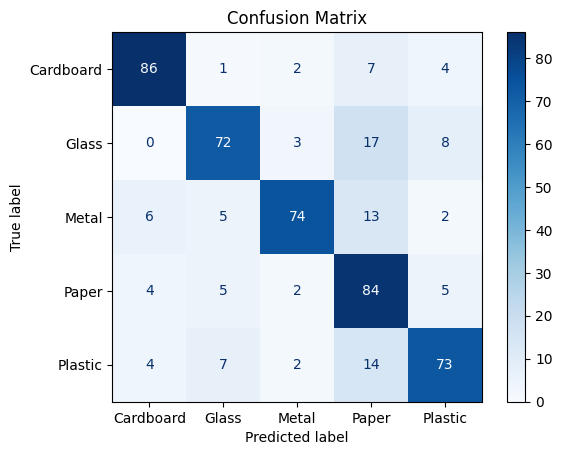

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf

# Capture the class names from the train or test dataset
raw_test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=target_size,
    batch_size=batch_size,
    label_mode="categorical",  # Multi-class classification
    shuffle=False  # Don't shuffle for evaluation
)

# Extract class names
class_names = raw_test_dataset.class_names

# Apply preprocessing and optimize the pipeline
test_dataset = raw_test_dataset.map(lambda x, y: (preprocess_input(x), y))
test_dataset = test_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# Get true labels and predictions
true_labels = np.concatenate([y for x, y in test_dataset], axis=0)
predictions = model.predict(test_dataset)
predicted_labels = np.argmax(predictions, axis=1)

# Compute confusion matrix
cm = confusion_matrix(np.argmax(true_labels, axis=1), predicted_labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()



Precision, Recall, and F1 Score

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Get predictions
predictions = model.predict(test_dataset)

# Get the true labels
true_labels = np.concatenate([y for x, y in test_dataset], axis=0)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(true_labels, axis=1)

# Calculate precision
precision = precision_score(true_labels, predicted_labels, average='weighted')
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(true_labels, predicted_labels, average='weighted')
print(f"Recall: {recall:.4f}")

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1:.4f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step
Precision: 0.7935
Recall: 0.7780
F1 Score: 0.7804


ROC Curve and AUC

16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step


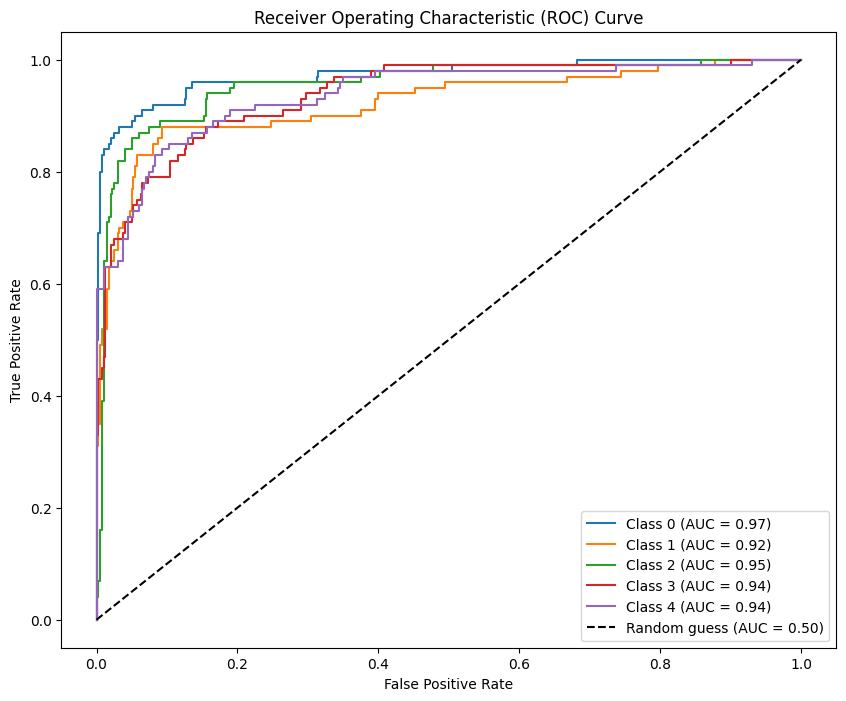

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predictions (probabilities) on the test dataset
predictions = model.predict(test_dataset)

# Get the true labels (one-hot encoded)
true_labels = np.concatenate([y for x, y in test_dataset], axis=0)
true_labels = np.argmax(true_labels, axis=1)

# Get the predicted probabilities for each class
predicted_probs = model.predict(test_dataset)

# Calculate ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

# Calculate for each class
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels == i, predicted_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(10, 8))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal line (no discrimination)
plt.plot([0, 1], [0, 1], 'k--', label='Random guess (AUC = 0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Plot Training Metrics

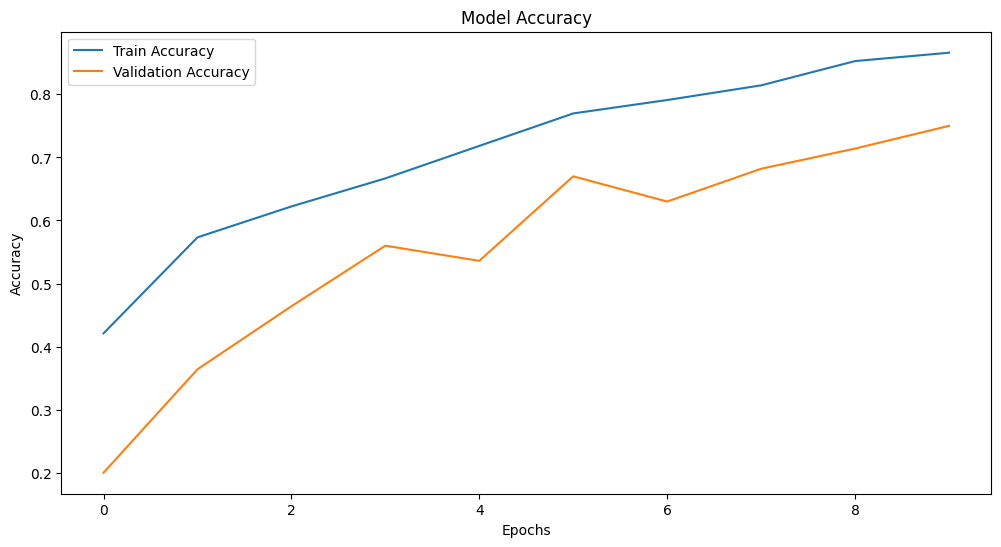

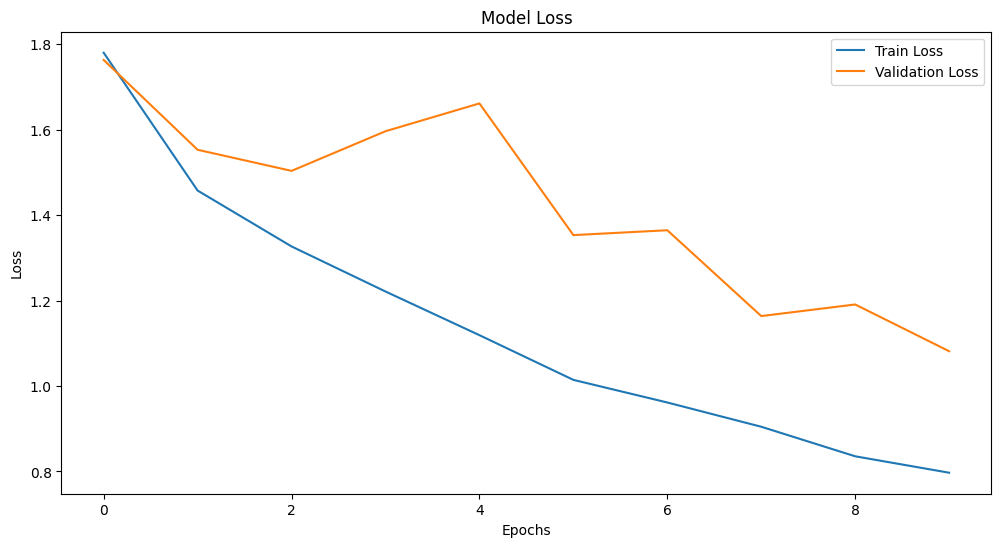

In [20]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()